In [ ]:
#pip install tensorflow

In [1]:
from datetime import datetime 
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta

In [98]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math

In [315]:
# initialize parameters 
start_date = datetime(2004, 1, 1) 
end_date = datetime(2024, 12, 2) 
  
# get the data 
data = yf.download('HDFCBANK.NS', start = start_date, 
                   end = end_date) 

[*********************100%%**********************]  1 of 1 completed


In [316]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,36.299999,36.799999,35.950001,36.665001,31.717115,1888540
2004-01-02,37.380001,37.509998,35.840000,36.285000,31.388386,4609750
2004-01-05,36.799999,37.150002,36.250000,36.520000,31.591679,2932510
2004-01-06,36.025002,37.240002,35.900002,36.150002,31.271606,4383810
2004-01-07,36.299999,37.000000,35.730000,36.090000,31.219700,3860850


In [317]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-06,1445.550049,1449.699951,1432.599976,1444.099976,1444.099976,20537870
2024-02-07,1453.000000,1453.800049,1426.650024,1429.949951,1429.949951,27418543
2024-02-08,1429.849976,1438.949951,1400.500000,1403.050049,1403.050049,34553062
2024-02-09,1392.150024,1414.199951,1387.000000,1403.599976,1403.599976,28321062
2024-02-12,1399.650024,1413.650024,1383.349976,1390.000000,1390.000000,17216671


<Axes: xlabel='Date', ylabel='Close'>

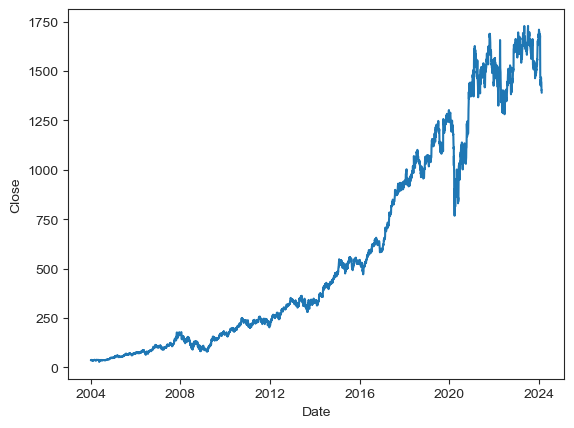

In [318]:
sns.lineplot(x="Date", y="Close", data=data)

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4980 entries, 2004-01-01 to 2024-02-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4980 non-null   float64
 1   High       4980 non-null   float64
 2   Low        4980 non-null   float64
 3   Close      4980 non-null   float64
 4   Adj Close  4980 non-null   float64
 5   Volume     4980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 272.3 KB


In [320]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [321]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03
mean,594.440452,600.122876,588.262987,594.306625,572.431582,7.192295e+06
std,529.471649,533.716835,524.885484,529.260302,524.157694,7.020792e+06
min,28.000000,34.494999,25.615000,27.985001,24.432024,0.000000e+00
25%,141.784996,144.896244,138.511250,141.867496,127.057674,3.197882e+06
50%,344.012497,347.325012,340.512497,344.437500,317.910812,5.326882e+06
75%,1041.593781,1052.425018,1032.837524,1041.675049,1006.113724,8.723637e+06
max,1723.449951,1757.500000,1713.800049,1728.199951,1728.199951,2.011300e+08


<Axes: >

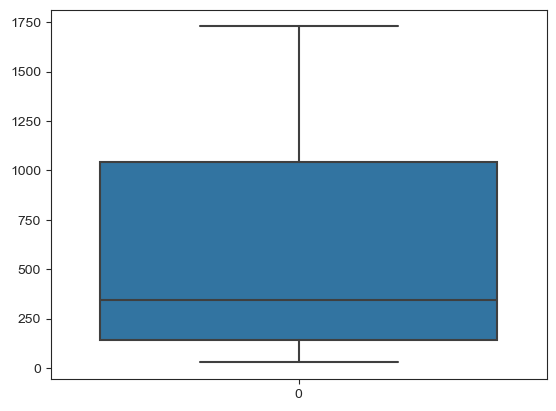

In [322]:
sns.boxplot(data['Close'])

In [323]:
data['Close'].skew()

0.7219993500300006

In [324]:
data['Close'].kurt()

-0.9381850952754993

In [ ]:
'''
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

'''

In [325]:
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.193853
p-value: 0.939250
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


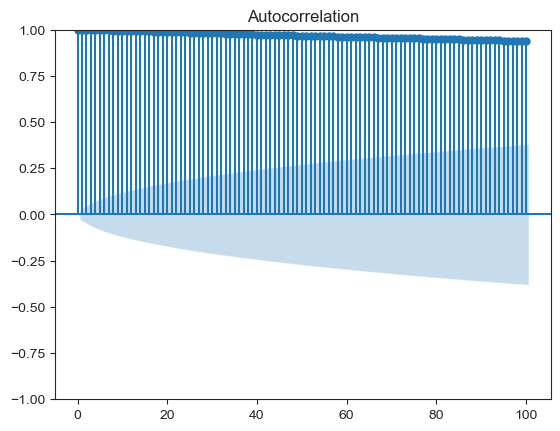

In [326]:
#Autocorrelation Function
plot_acf(data["Close"], lags=100)
plt.show()

In [ ]:
'''
Wrote different code for Transformation 

#Transform the series into Stationary Data

# Apply logarithmic transformation
data['Close_logs'] = np.log(data['Close'])

# Calculate first differences
data["Close_diff"] = data['Close_logs'].diff()

# Convert to growth rates (multiply by 100)
data['Close_growth'] = data['Close_diff'] * 100

# Display the transformed dataset
data.head()

'''

In [327]:
#Transform the series into Stationary Data

df_stationary = data.copy()
df_stationary = df_stationary[['Close']]
df_stationary['Close_1'] = df_stationary['Close'].shift(1)
df_stationary.dropna(inplace=True)

df_stationary['Target'] = np.log(df_stationary['Close']/df_stationary['Close_1'])*100
df_stationary.dropna(inplace=True)

df_stationary.head()

,Close,Close_1,Target
Date,,,
2004-01-02,36.285000,36.665001,-1.041822
2004-01-05,36.520000,36.285000,0.645564
2004-01-06,36.150002,36.520000,-1.018308
2004-01-07,36.090000,36.150002,-0.166117
2004-01-08,36.165001,36.090000,0.207600


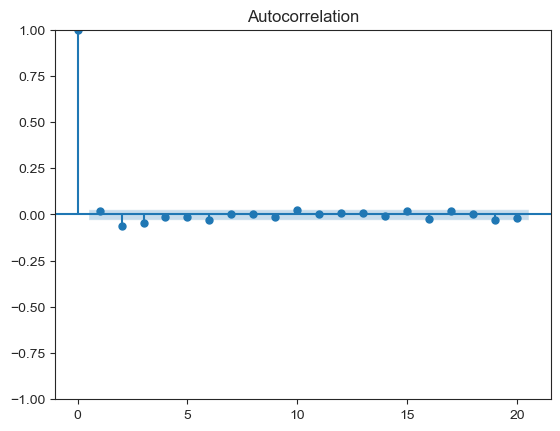

In [328]:
plot_acf(df_stationary['Target'].dropna(), lags=20)
plt.show()

In [329]:
adftest = adfuller(df_stationary["Target"].dropna())
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -31.64572078776166
P-Value: 0.0
Number of lags: 5
Number of observations: 4973
Critical Values {'1%': -3.431665640184842, '5%': -2.8621213700013244, '10%': -2.567079464076049}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary


<Axes: xlabel='Date', ylabel='Target'>

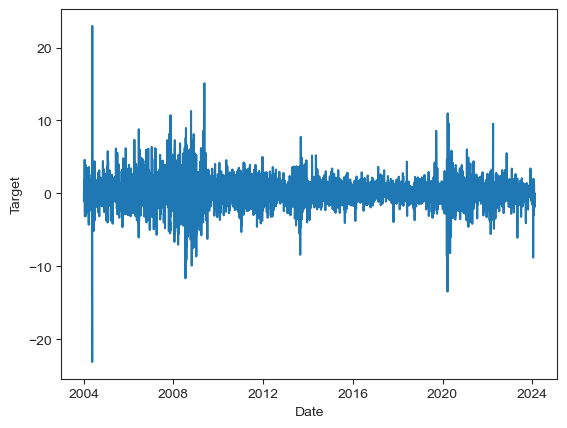

In [330]:
sns.lineplot(x="Date", y="Target", data=df_stationary)

In [331]:
df_stationary.describe()

,Close,Close_1,Target
count,4979.000000,4979.000000,4979.000000
mean,594.418624,594.146815,0.073011
std,529.254436,529.193280,1.864141
min,27.985001,27.985001,-23.122228
25%,141.947495,141.864998,-0.804538
50%,344.500000,344.375000,0.033770
75%,1041.675049,1041.662537,0.928430
max,1728.199951,1728.199951,22.966143


<Axes: xlabel='Target', ylabel='Density'>

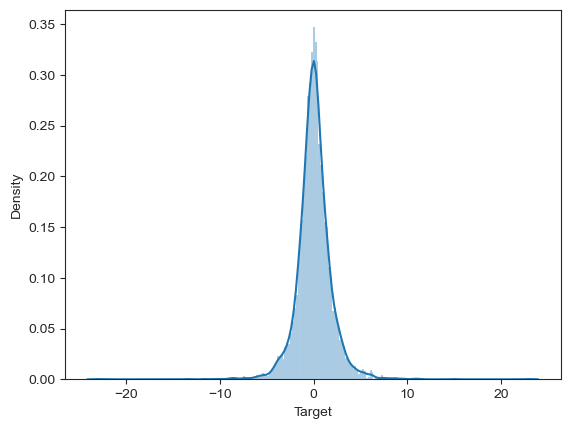

In [332]:
sns.histplot(df_stationary["Target"], kde=True,
             stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

In [333]:
df = df_stationary.copy()

In [334]:
df.head()

,Close,Close_1,Target
Date,,,
2004-01-02,36.285000,36.665001,-1.041822
2004-01-05,36.520000,36.285000,0.645564
2004-01-06,36.150002,36.520000,-1.018308
2004-01-07,36.090000,36.150002,-0.166117
2004-01-08,36.165001,36.090000,0.207600


In [335]:
df = df[['Target']]
df.head()

,Target
Date,
2004-01-02,-1.041822
2004-01-05,0.645564
2004-01-06,-1.018308
2004-01-07,-0.166117
2004-01-08,0.207600


In [336]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    #df.set_index('Date', inplace=True)
    
    for i in range(n_steps, 0, -1):
        df[f'Close(t-{i})'] = df['Target'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df.head()

,Target,Close(t-30),Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),Close(t-19),Close(t-18),Close(t-17),Close(t-16),Close(t-15),Close(t-14),Close(t-13),Close(t-12),Close(t-11),Close(t-10),Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02-13,0.066718,-1.041822,0.645564,-1.018308,-0.166117,0.207600,1.862813,-0.968166,0.000000,0.778001,4.596982,-0.886924,-3.140645,0.000000,-0.189444,-0.638634,-0.533042,0.000000,0.205355,-1.488043,-1.172876,-3.153124,0.000000,-2.420718,3.859798,1.924498,-0.562196,2.642715,2.333577,0.454916,0.000000
2004-02-16,0.903061,0.645564,-1.018308,-0.166117,0.207600,1.862813,-0.968166,0.000000,0.778001,4.596982,-0.886924,-3.140645,0.000000,-0.189444,-0.638634,-0.533042,0.000000,0.205355,-1.488043,-1.172876,-3.153124,0.000000,-2.420718,3.859798,1.924498,-0.562196,2.642715,2.333577,0.454916,0.000000,0.066718
2004-02-17,0.658851,-1.018308,-0.166117,0.207600,1.862813,-0.968166,0.000000,0.778001,4.596982,-0.886924,-3.140645,0.000000,-0.189444,-0.638634,-0.533042,0.000000,0.205355,-1.488043,-1.172876,-3.153124,0.000000,-2.420718,3.859798,1.924498,-0.562196,2.642715,2.333577,0.454916,0.000000,0.066718,0.903061
2004-02-18,-0.355236,-0.166117,0.207600,1.862813,-0.968166,0.000000,0.778001,4.596982,-0.886924,-3.140645,0.000000,-0.189444,-0.638634,-0.533042,0.000000,0.205355,-1.488043,-1.172876,-3.153124,0.000000,-2.420718,3.859798,1.924498,-0.562196,2.642715,2.333577,0.454916,0.000000,0.066718,0.903061,0.658851
2004-02-19,-1.206676,0.207600,1.862813,-0.968166,0.000000,0.778001,4.596982,-0.886924,-3.140645,0.000000,-0.189444,-0.638634,-0.533042,0.000000,0.205355,-1.488043,-1.172876,-3.153124,0.000000,-2.420718,3.859798,1.924498,-0.562196,2.642715,2.333577,0.454916,0.000000,0.066718,0.903061,0.658851,-0.355236


In [337]:
# Adding indicators
shifted_df['RSI']=ta.rsi(shifted_df.Target, length=15)
shifted_df['EMAF']=ta.ema(shifted_df.Target, length=20)
shifted_df['EMAM']=ta.ema(shifted_df.Target, length=100)
shifted_df['EMAS']=ta.ema(shifted_df.Target, length=150)

shifted_df.dropna(inplace=True)
shifted_df.reset_index(inplace = True)

In [338]:
shifted_df.head()

,Date,Target,Close(t-30),Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),Close(t-19),Close(t-18),Close(t-17),Close(t-16),Close(t-15),Close(t-14),Close(t-13),Close(t-12),Close(t-11),Close(t-10),Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),RSI,EMAF,EMAM,EMAS
0,2004-09-09,-3.131902,0.976144,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,43.585484,0.219814,0.056046,0.012956
1,2004-09-10,1.996179,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,52.940516,0.388991,0.094464,0.039223
2,2004-09-13,-0.308481,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,49.025849,0.322565,0.086485,0.034618
3,2004-09-14,0.743882,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,50.805540,0.362691,0.099503,0.044012
4,2004-09-15,0.979087,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,51.213427,0.421395,0.116920,0.056397


In [339]:
pd.set_option('display.max_columns', None)
shifted_df.head(20)

,Date,Target,Close(t-30),Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),Close(t-19),Close(t-18),Close(t-17),Close(t-16),Close(t-15),Close(t-14),Close(t-13),Close(t-12),Close(t-11),Close(t-10),Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),RSI,EMAF,EMAM,EMAS
0,2004-09-09,-3.131902,0.976144,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,43.585484,0.219814,0.056046,0.012956
1,2004-09-10,1.996179,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,52.940516,0.388991,0.094464,0.039223
2,2004-09-13,-0.308481,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,49.025849,0.322565,0.086485,0.034618
3,2004-09-14,0.743882,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,50.805540,0.362691,0.099503,0.044012
4,2004-09-15,0.979087,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,51.213427,0.421395,0.116920,0.056397
5,2004-09-16,0.075889,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,0.979087,49.524003,0.388490,0.116108,0.056656
6,2004-09-17,1.866410,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,0.979087,0.075889,52.829132,0.529244,0.150767,0.080626
7,2004-09-20,0.532213,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,0.979087,0.075889,1.866410,50.204606,0.529527,0.158321,0.086607
8,2004-09-21,0.283508,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,0.979087,0.075889,1.866410,0.532213,49.711364,0.506096,0.160800,0.089215
9,2004-09-22,1.466308,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,0.979087,0.075889,1.866410,0.532213,0.283508,52.108882,0.597545,0.186651,0.107455


In [340]:
shifted_df.describe()

,Date,Target,Close(t-30),Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),Close(t-19),Close(t-18),Close(t-17),Close(t-16),Close(t-15),Close(t-14),Close(t-13),Close(t-12),Close(t-11),Close(t-10),Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),RSI,EMAF,EMAM,EMAS
count,4800,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,2014-05-23 03:15:54,0.074233,0.079734,0.079394,0.079437,0.079297,0.079910,0.079794,0.079177,0.079259,0.079209,0.078875,0.078759,0.079358,0.079765,0.078104,0.077299,0.077204,0.077215,0.076848,0.076839,0.075941,0.076226,0.075818,0.076633,0.076588,0.076502,0.076433,0.076289,0.076124,0.075341,0.075093,49.976414,0.076536,0.077810,0.077567
min,2004-09-09 00:00:00,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,-13.475382,32.050885,-2.974366,-0.843156,-0.568697
25%,2009-07-13 18:00:00,-0.804112,-0.803642,-0.803642,-0.803642,-0.803642,-0.803007,-0.803007,-0.803642,-0.803007,-0.803007,-0.803007,-0.803007,-0.802087,-0.801018,-0.801018,-0.802087,-0.803007,-0.803007,-0.803007,-0.803007,-0.803642,-0.803642,-0.803642,-0.803007,-0.803007,-0.803007,-0.803007,-0.803007,-0.803642,-0.803905,-0.803905,47.992907,-0.115992,-0.001513,0.015985
50%,2014-05-21 12:00:00,0.036242,0.040168,0.039610,0.040168,0.040168,0.040839,0.040168,0.039610,0.039610,0.039610,0.038287,0.036862,0.038287,0.039610,0.039610,0.038287,0.038287,0.038287,0.038287,0.038287,0.036862,0.038287,0.036862,0.038287,0.038287,0.038287,0.036862,0.036531,0.036531,0.036396,0.036396,49.870445,0.096860,0.090107,0.086447
75%,2019-04-05 18:00:00,0.925470,0.928336,0.927677,0.927677,0.927677,0.928336,0.928336,0.927677,0.927677,0.927677,0.927290,0.927290,0.927677,0.927677,0.927677,0.927677,0.927677,0.927677,0.927677,0.927677,0.927290,0.927677,0.927290,0.927677,0.927677,0.927677,0.927677,0.927677,0.927677,0.927290,0.926041,51.880867,0.286900,0.162161,0.145732
max,2024-02-12 00:00:00,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,15.100512,67.073860,1.964152,0.655032,0.507791
std,NaN,1.813488,1.809129,1.809114,1.809111,1.809211,1.809048,1.809068,1.808972,1.808924,1.808913,1.808857,1.808875,1.809005,1.808852,1.813352,1.814037,1.814084,1.814083,1.814525,1.814515,1.814206,1.814301,1.814259,1.813909,1.813902,1.813962,1.813962,1.813945,1.814006,1.814047,1.813971,3.148489,0.378471,0.153966,0.120163


In [82]:
#shifted_df.iloc[4074, :]

Target         0.908996
Close(t-7)    -2.141703
Close(t-6)     1.328118
Close(t-5)    -3.708061
Close(t-4)    -2.743742
Close(t-3)     1.379486
Close(t-2)     6.018033
Close(t-1)     5.519463
RSI           50.569128
EMAF           0.785418
EMAM           0.344047
EMAS           0.287608
Name: 2021-02-03 00:00:00, dtype: float64

<Axes: xlabel='RSI', ylabel='Density'>

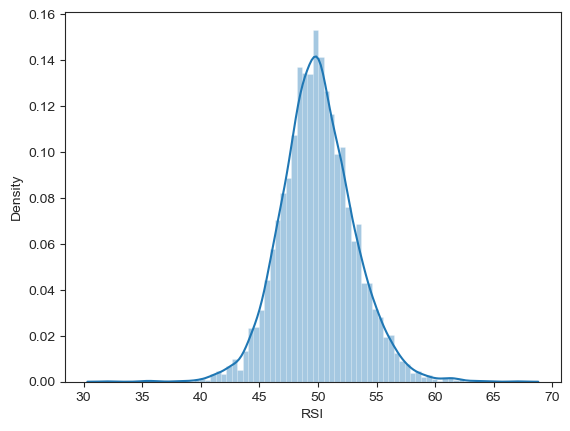

In [341]:
sns.histplot(shifted_df["RSI"], kde=True,
             stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

In [ ]:
'''
Already Transformation done, no need for MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df = sc.fit_transform(df)
print(df)

'''

In [342]:
shifted_df.set_index('Date', inplace=True)
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[-3.13190155,  0.97614382, -0.14648196, ...,  0.21981367,
         0.05604587,  0.0129556 ],
       [ 1.996179  , -0.14648196, -0.88342653, ...,  0.38899132,
         0.09446435,  0.03922346],
       [-0.30848079, -0.88342653, -1.87276104, ...,  0.3225654 ,
         0.08648524,  0.03461811],
       ...,
       [-1.89909713,  1.23165392,  0.1144153 , ..., -0.61280834,
        -0.21645908, -0.1512547 ],
       [ 0.03918741,  0.1144153 ,  0.23429503, ..., -0.55071351,
        -0.21139678, -0.14873229],
       [-0.97366002,  0.23429503, -0.65447132, ..., -0.59099413,
        -0.2264911 , -0.15965849]])

In [343]:
shifted_df_as_np.shape

(4800, 35)

In [344]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((4800, 34), (4800,))

In [345]:
y

array([-3.13190155,  1.996179  , -0.30848079, ..., -1.89909713,
        0.03918741, -0.97366002])

In [346]:
split_index = int(len(X) * 0.85)

split_index

4080

In [347]:
# split data into train test sets
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4080, 34), (720, 34), (4080,), (720,))

In [348]:
X_test[0][0][0]

IndexError: invalid index to scalar variable.

In [349]:
y_test[0][0]

IndexError: invalid index to scalar variable.

In [350]:
shifted_df.iloc[split_index, :]

Target         -1.117222
Close(t-30)     5.519463
Close(t-29)     0.908996
Close(t-28)     0.272674
Close(t-27)     1.164744
Close(t-26)     0.477702
Close(t-25)     0.410306
Close(t-24)    -1.885074
Close(t-23)    -0.596053
Close(t-22)     0.608693
Close(t-21)     2.166693
Close(t-20)     0.619754
Close(t-19)    -2.499237
Close(t-18)    -2.050502
Close(t-17)    -0.982750
Close(t-16)     0.576596
Close(t-15)    -1.225173
Close(t-14)     4.931470
Close(t-13)    -0.003108
Close(t-12)    -4.585622
Close(t-11)     1.584102
Close(t-10)     0.594797
Close(t-9)      1.182247
Close(t-8)     -2.217423
Close(t-7)     -1.430893
Close(t-6)     -0.688640
Close(t-5)      2.790577
Close(t-4)     -0.432936
Close(t-3)     -0.244557
Close(t-2)     -1.512716
Close(t-1)     -1.085251
RSI            48.247249
EMAF           -0.322509
EMAM            0.095742
EMAS            0.129254
Name: 2021-03-17 00:00:00, dtype: float64

In [352]:
df_stationary.iloc[split_index+149+lookback, :]

Close      1495.349976
Close_1    1512.150024
Target       -1.117222
Name: 2021-03-17 00:00:00, dtype: float64

In [353]:
calculation_close = df_stationary.iloc[split_index+149+lookback, 1]
calculation_close

1512.1500244140625

In [354]:
shifted_df.head()

,Target,Close(t-30),Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),Close(t-19),Close(t-18),Close(t-17),Close(t-16),Close(t-15),Close(t-14),Close(t-13),Close(t-12),Close(t-11),Close(t-10),Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),RSI,EMAF,EMAM,EMAS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-09-09,-3.131902,0.976144,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,43.585484,0.219814,0.056046,0.012956
2004-09-10,1.996179,-0.146482,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,52.940516,0.388991,0.094464,0.039223
2004-09-13,-0.308481,-0.883427,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,49.025849,0.322565,0.086485,0.034618
2004-09-14,0.743882,-1.872761,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,50.805540,0.362691,0.099503,0.044012
2004-09-15,0.979087,0.041086,1.845122,-1.176408,0.569655,1.183124,0.080157,-0.966182,-1.576553,-0.839128,0.468584,-0.592983,-0.055342,-1.225308,2.024752,2.855598,0.000000,1.246373,-2.657207,0.472493,-0.974431,0.244499,0.635611,-0.188908,1.859958,1.225393,3.158085,-3.131902,1.996179,-0.308481,0.743882,51.213427,0.421395,0.116920,0.056397


In [355]:
X_train = X_train.reshape((-1, lookback+4, 1))
X_test = X_test.reshape((-1, lookback+4, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4080, 34, 1), (720, 34, 1), (4080, 1), (720, 1))

In [356]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
#np.random.seed(10)

lstm_input = Input(shape=(lookback+4, 1), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=20, shuffle=True, validation_split = 0.1)

Epoch 1/20
245/245 [==============================] - 4s 16ms/step - loss: 2.2237 - val_loss: 1.2492
Epoch 2/20
245/245 [==============================] - 4s 15ms/step - loss: 0.8610 - val_loss: 0.9607
Epoch 3/20
245/245 [==============================] - 4s 15ms/step - loss: 0.3118 - val_loss: 0.6607
Epoch 4/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1912 - val_loss: 0.7079
Epoch 5/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1432 - val_loss: 0.3029
Epoch 6/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1454 - val_loss: 0.5642
Epoch 7/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1228 - val_loss: 0.2314
Epoch 8/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1384 - val_loss: 0.2982
Epoch 9/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1187 - val_loss: 0.3396
Epoch 10/20
245/245 [==============================] - 4s 15ms/step - loss: 0.0855 - val_lo

In [357]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
model = Sequential()
model.add(LSTM(150,input_shape=(lookback+4,1), return_sequences=True))
model.add(LSTM(150))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=20, shuffle=True, validation_split = 0.1)

Epoch 1/20
245/245 [==============================] - 10s 36ms/step - loss: 2.5672 - val_loss: 1.8890
Epoch 2/20
245/245 [==============================] - 9s 37ms/step - loss: 0.6000 - val_loss: 0.7349
Epoch 3/20
245/245 [==============================] - 9s 38ms/step - loss: 0.2942 - val_loss: 0.5986
Epoch 4/20
245/245 [==============================] - 10s 39ms/step - loss: 0.1983 - val_loss: 0.4513
Epoch 5/20
245/245 [==============================] - 9s 36ms/step - loss: 0.1565 - val_loss: 0.3712
Epoch 6/20
245/245 [==============================] - 9s 35ms/step - loss: 0.1715 - val_loss: 0.3742
Epoch 7/20
245/245 [==============================] - 9s 35ms/step - loss: 0.1177 - val_loss: 0.5084
Epoch 8/20
245/245 [==============================] - 9s 35ms/step - loss: 0.1652 - val_loss: 0.4447
Epoch 9/20
245/245 [==============================] - 9s 35ms/step - loss: 0.1126 - val_loss: 0.2824
Epoch 10/20
245/245 [==============================] - 9s 35ms/step - loss: 0.0944 - val_

In [358]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

23/23 [==============================] - 1s 14ms/step
[-1.2663252] [-1.11722185]
[-0.36592865] [-0.2913241]
[0.4103812] [0.43500152]
[-2.0756452] [-1.91130321]
[2.0309157] [2.08811005]
[-1.5145309] [-1.43341383]
[-1.1703227] [-1.05026699]
[1.9086434] [1.89199443]
[4.542478] [4.09908962]
[-4.1858253] [-3.94163465]


In [359]:
type(y_test)
df_ypred = pd.DataFrame(y_pred, columns=['Target'])
df_ytest = pd.DataFrame(y_test, columns=['Target'])
df_ytest.shape

(720, 1)

In [360]:
df_ypred.head()

,Target
0,-1.266325
1,-0.365929
2,0.410381
3,-2.075645
4,2.030916


In [361]:
df_ytest.iloc[0, 0]

-1.117221850315693

In [362]:
print((math.exp((df_ytest.iloc[0, 0]/100))*calculation_close))

1495.3499755859375


In [363]:
df_ytest.loc[0, 'Close'] = math.exp((df_ytest.iloc[0, 0]/100))*calculation_close
df_ytest.head()

,Target,Close
0,-1.117222,1495.349976
1,-0.291324,NaN
2,0.435002,NaN
3,-1.911303,NaN
4,2.088110,NaN


In [364]:
#Transform the series from Stationary Data


df_ytest.loc[0, 'Close'] = math.exp((df_ytest.iloc[0, 0]/100))*calculation_close
df_ypred.loc[0, 'Close'] = math.exp((df_ypred.iloc[0, 0]/100))*calculation_close

for i in range(1, len(df_ytest)):
    df_ytest.loc[i, 'Close'] = math.exp((df_ytest.iloc[i, 0]/100))*df_ytest.loc[i-1, 'Close']
    df_ypred.loc[i, 'Close'] = math.exp((df_ypred.iloc[i, 0]/100))*df_ytest.loc[i-1, 'Close']
    

# Display the transformed dataset
df_ytest.head()

,Target,Close
0,-1.117222,1495.349976
1,-0.291324,1491.000000
2,0.435002,1497.500000
3,-1.911303,1469.150024
4,2.088110,1500.150024


In [365]:
df_ytest['Close'][0]

1495.3499755859375

In [366]:
df_Output = df_stationary.copy()

In [367]:
df_Output.iloc[4230, :]

Close      1574.800049
Close_1    1560.550049
Target        0.908996
Name: 2021-02-03 00:00:00, dtype: float64

In [368]:
df_Output.reset_index(inplace = True)

In [369]:
df_Output.iloc[4230, 0]

Timestamp('2021-02-03 00:00:00')

In [370]:
for i in range(0, len(df_ytest)):
    df_ytest.loc[i, 'Date'] = df_Output.iloc[4230+i, 0]

In [371]:
df_ypred.head()

,Target,Close
0,-1.266325,1493.122020
1,-0.365929,1489.888061
2,0.410381,1497.131356
3,-2.075645,1466.737577
4,2.030916,1499.292269


In [372]:
df_ypred.tail()

,Target,Close
715,-0.142533,1442.792058
716,-1.119251,1428.026992
717,-2.088338,1400.397417
718,-0.067653,1402.101162
719,-1.087479,1388.418821


In [373]:
df_ytest['Pred'] = df_ypred['Target']
df_ytest['Pred_Close'] = df_ypred['Close']

In [374]:
df_ytest.tail(20)

,Target,Close,Date,Pred,Pred_Close
700,1.907125,1672.800049,2023-12-04,2.130511,1676.541025
701,0.378883,1679.150024,2023-12-05,0.300217,1677.829621
702,-8.813001,1537.500000,2023-12-06,-7.574857,1556.654800
703,-3.396882,1486.150024,2023-12-07,-3.406782,1486.002906
704,-1.048440,1470.650024,2023-12-08,-1.321690,1466.636959
705,0.000000,1470.650024,2023-12-11,-0.157678,1468.332959
706,-2.988494,1427.349976,2023-12-12,-3.374175,1421.855556
707,1.980472,1455.900024,2023-12-13,1.816728,1453.518017
708,-1.452911,1434.900024,2023-12-14,-1.553237,1433.461157
709,1.367016,1454.650024,2023-12-15,1.237194,1452.762790


Text(0.5, 1.0, 'The Stock Price of HDFC')

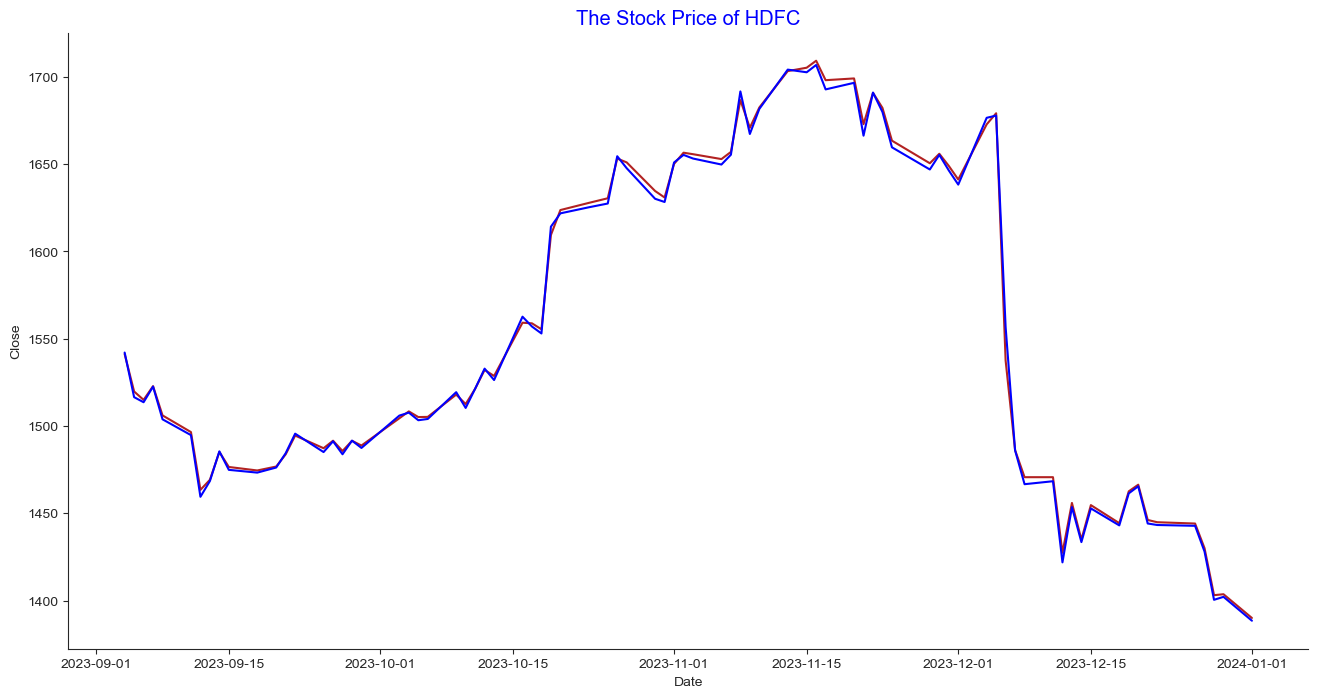

In [375]:
plt.figure(figsize=(16,8))
sns.set_style("ticks")
sns.lineplot(data=df_ytest.iloc[-80:,],x="Date",y='Close',color='firebrick')
sns.lineplot(data=df_ytest.iloc[-80:,],x="Date",y='Pred_Close',color='blue')
sns.despine()
plt.title("The Stock Price of HDFC",size='x-large',color='blue')

Text(0.5, 1.0, 'The Stock Price of HDFC')

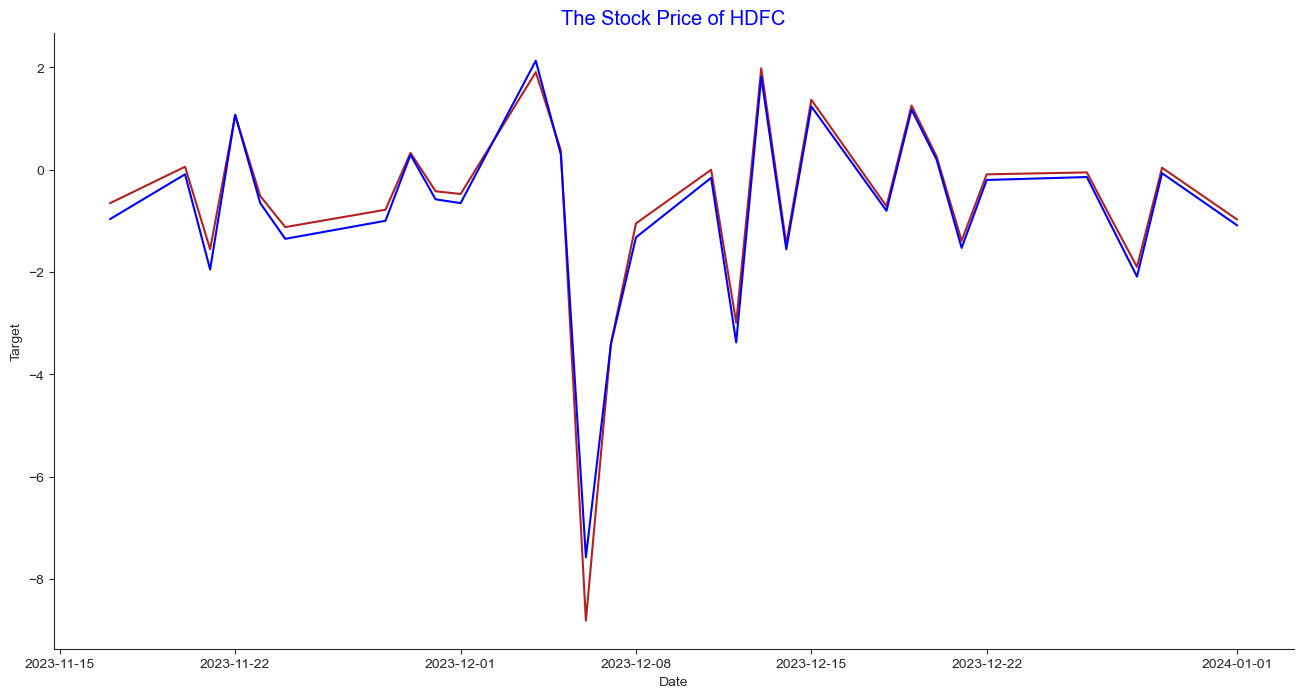

In [376]:
plt.figure(figsize=(16,8))
sns.set_style("ticks")
sns.lineplot(data=df_ytest.iloc[-30:,],x="Date",y='Target',color='firebrick')
sns.lineplot(data=df_ytest.iloc[-30:,],x="Date",y='Pred',color='blue')
sns.despine()
plt.title("The Stock Price of HDFC",size='x-large',color='blue')

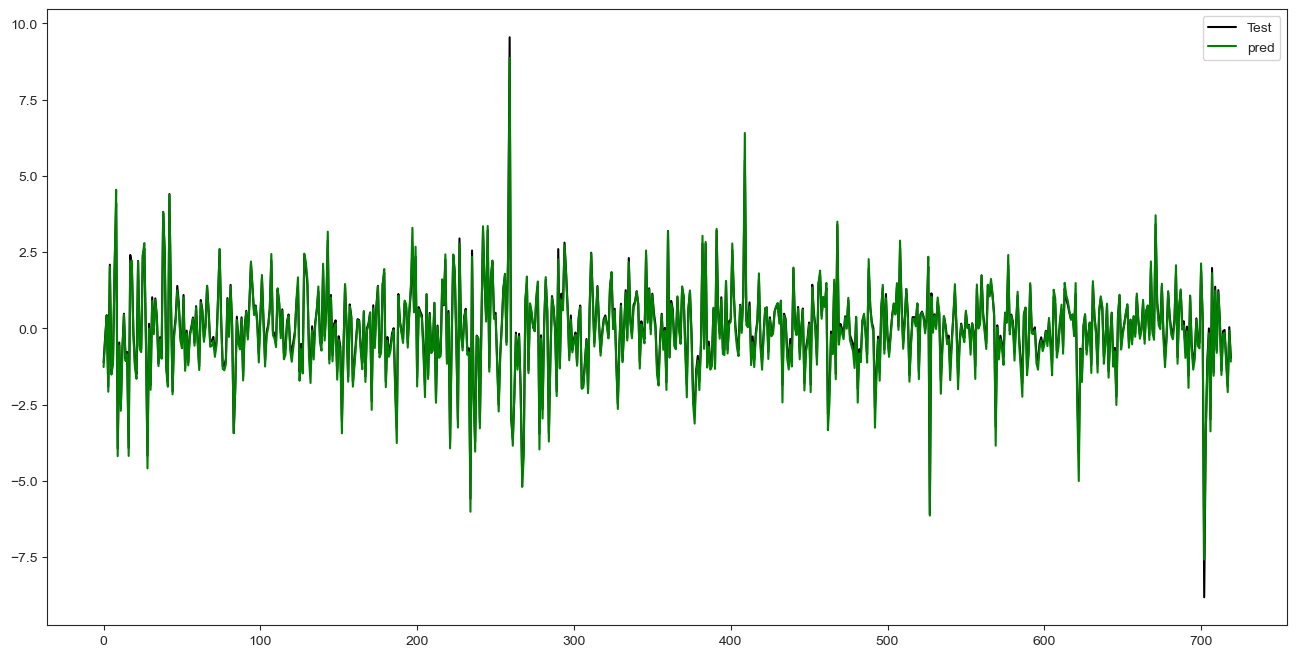

In [377]:
plt.figure(figsize=(16,8))
plt.plot(df_ytest['Target'], color = 'black', label = 'Test')
plt.plot(df_ypred['Target'], color = 'green', label = 'pred')
plt.legend()
plt.show()

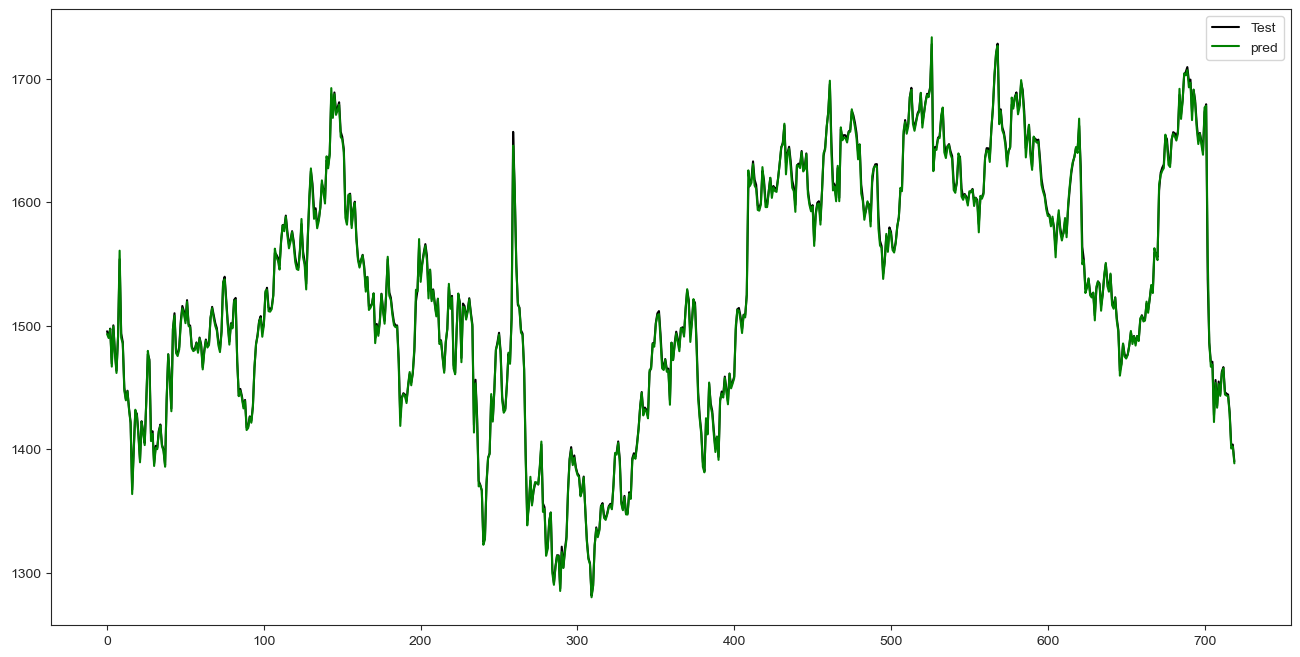

In [378]:
plt.figure(figsize=(16,8))
plt.plot(df_ytest['Close'], color = 'black', label = 'Test')
plt.plot(df_ypred['Close'], color = 'green', label = 'pred')
plt.legend()
plt.show()

In [404]:
X_test.shape

(720, 34, 1)

In [396]:
y_test[-1][0]

-0.9736600190433492

In [392]:
X_test[-1]

array([[-6.54471322e-01],
       [ 5.88720148e-02],
       [-1.55400228e+00],
       [ 1.06726847e+00],
       [-5.12891511e-01],
       [-1.12087020e+00],
       [-7.81545725e-01],
       [ 3.29656047e-01],
       [-4.20578921e-01],
       [-4.74139174e-01],
       [ 1.90712465e+00],
       [ 3.78882921e-01],
       [-8.81300068e+00],
       [-3.39688209e+00],
       [-1.04844032e+00],
       [ 0.00000000e+00],
       [-2.98849354e+00],
       [ 1.98047218e+00],
       [-1.45291055e+00],
       [ 1.36701613e+00],
       [-7.14052971e-01],
       [ 1.25567120e+00],
       [ 2.59478224e-01],
       [-1.38714335e+00],
       [-8.99376628e-02],
       [-5.19219806e-02],
       [-9.84682877e-01],
       [-1.89909713e+00],
       [ 3.91874128e-02],
       [ 4.90998795e+01],
       [ 4.90998795e+01],
       [-5.90994128e-01],
       [-2.26491100e-01],
       [-1.59658487e-01]])

In [397]:
len(dev)

34

In [398]:
dev = X_test[-1]
for i in range(0,len(dev)-5):
    dev[i] = dev[i+1]

dev[len(dev)-4] = y_test[-1][0]
dev

array([[-5.12891511e-01],
       [-1.12087020e+00],
       [-7.81545725e-01],
       [ 3.29656047e-01],
       [-4.20578921e-01],
       [-4.74139174e-01],
       [ 1.90712465e+00],
       [ 3.78882921e-01],
       [-8.81300068e+00],
       [-3.39688209e+00],
       [-1.04844032e+00],
       [ 0.00000000e+00],
       [-2.98849354e+00],
       [ 1.98047218e+00],
       [-1.45291055e+00],
       [ 1.36701613e+00],
       [-7.14052971e-01],
       [ 1.25567120e+00],
       [ 2.59478224e-01],
       [-1.38714335e+00],
       [-8.99376628e-02],
       [-5.19219806e-02],
       [-9.84682877e-01],
       [-1.89909713e+00],
       [ 3.91874128e-02],
       [ 4.90998795e+01],
       [ 4.90998795e+01],
       [ 4.90998795e+01],
       [-9.73660019e-01],
       [-9.73660019e-01],
       [-9.73660019e-01],
       [-5.90994128e-01],
       [-2.26491100e-01],
       [-1.59658487e-01]])

In [405]:
dev = dev.reshape((1, lookback+4, 1))

In [406]:
dev.shape

(1, 34, 1)

In [407]:
y_pred = model.predict(dev)

1/1 [==============================] - 0s 15ms/step
